# NYC Restaurants

In [58]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import seaborn as sns
import numpy as np
import pandas as pd
import os

# set seaborn style
sns.set(style='ticks')

# set laptop location
home = '/Users/karenhao/'
office = '/users/khao/'

location = home+'Google Drive/02 Working/Quartz/Education/GA Data Science/DAT-NYC-6.13'

### import data

In [9]:
os.chdir(location+'/data/nyc-restaurants')

nyc_restaurants = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
nyc_restaurants['CUISINE DESCRIPTION'] = nyc_restaurants['CUISINE DESCRIPTION'].apply(lambda cuisine: 'Latin' if 'Latin' in cuisine else cuisine)

### high-level summary statistics

In [10]:
nyc_restaurants.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection


In [11]:
nyc_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399918 entries, 0 to 399917
Data columns (total 18 columns):
CAMIS                    399918 non-null int64
DBA                      399559 non-null object
BORO                     399918 non-null object
BUILDING                 399809 non-null object
STREET                   399909 non-null object
ZIPCODE                  399909 non-null float64
PHONE                    399913 non-null object
CUISINE DESCRIPTION      399918 non-null object
INSPECTION DATE          399918 non-null object
ACTION                   398783 non-null object
VIOLATION CODE           393414 non-null object
VIOLATION DESCRIPTION    392939 non-null object
CRITICAL FLAG            399918 non-null object
SCORE                    376704 non-null float64
GRADE                    195413 non-null object
GRADE DATE               192820 non-null object
RECORD DATE              399918 non-null object
INSPECTION TYPE          398783 non-null object
dtypes: float64(2), int6

In [12]:
nyc_restaurants.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,3.999180e+05,399559,399918,399809,399909,399909.000000,399913,399918,399918,398783,393414,392939,399918,376704.000000,195413,192820,399918,398783
unique,NaN,20936,6,7256,3328,NaN,25165,84,1414,5,97,93,3,NaN,6,1325,1,34
top,NaN,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,NaN,7186566210,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,NaN,A,08/24/2016,08/28/2017,Cycle Inspection / Initial Inspection
freq,NaN,4296,159574,2372,14791,NaN,240,90968,1135,380632,55785,55785,220082,NaN,154194,455,399918,230431
mean,4.441662e+07,NaN,NaN,NaN,NaN,10673.386933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.910181,NaN,NaN,NaN,NaN
std,4.245117e+06,NaN,NaN,NaN,NaN,598.959356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.958955,NaN,NaN,NaN,NaN
min,3.007544e+07,NaN,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN
25%,4.121603e+07,NaN,NaN,NaN,NaN,10022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN
50%,4.160911e+07,NaN,NaN,NaN,NaN,10467.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN
75%,5.000934e+07,NaN,NaN,NaN,NaN,11229.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN


In [13]:
print("types of cuisines:",nyc_restaurants['CUISINE DESCRIPTION'].nunique())
print("number of grades:",nyc_restaurants['GRADE'].nunique())
print("number of boros:",nyc_restaurants['BORO'].nunique())

types of cuisines: 84
number of grades: 6
number of boros: 6


### what are the top cuisines?

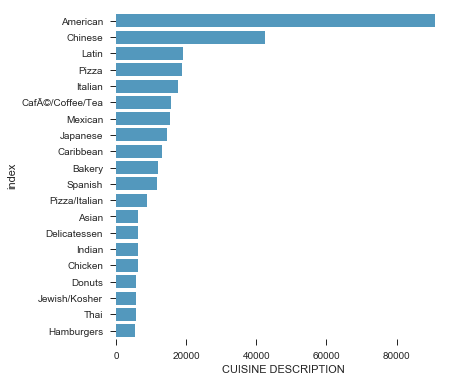

In [14]:
# count cuisines
fig, ax = plt.subplots(figsize=(6,6))
cuisines = nyc_restaurants['CUISINE DESCRIPTION'].value_counts().reset_index()
top_cuisines = cuisines[:20]

# plot
sns.barplot('CUISINE DESCRIPTION','index', data=top_cuisines,color='#419DCF',ax=ax)
sns.despine(left=True,bottom=True)

### how many restaurants are in each boro?

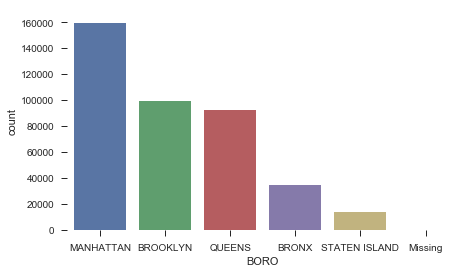

In [15]:
fig, ax = plt.subplots(figsize=(7,4))
sns.countplot('BORO',data=nyc_restaurants,order=nyc_restaurants['BORO'].value_counts().index,ax=ax)
sns.despine(left=True,bottom=True)

### what is the distribution of health grades?

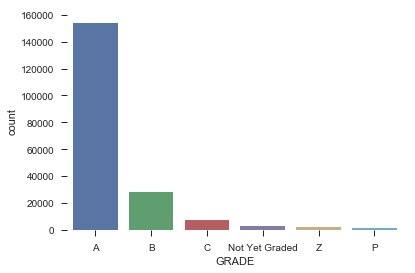

In [16]:
sns.countplot('GRADE',data=nyc_restaurants,order=nyc_restaurants['GRADE'].value_counts().index)
sns.despine(left=True,bottom=True)

### how are health grades distributed differently across boros?

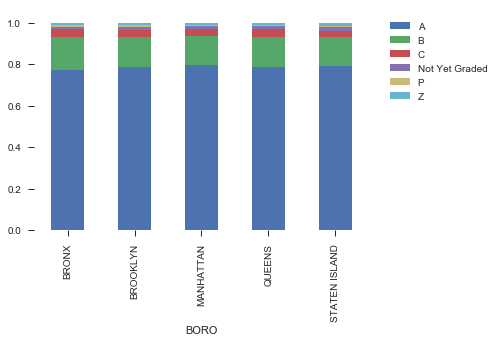

In [17]:
# groupby boros
grades_by_boro = nyc_restaurants.groupby(['BORO','GRADE'])['DBA'].count()
grades_by_boro = grades_by_boro.unstack()
grades_by_boro['total'] = grades_by_boro.sum(axis=1)

# calculate distribution of grades across boros
grades_by_boro_percent = grades_by_boro.copy()

for column in grades_by_boro_percent.columns:
    grades_by_boro_percent[column] = grades_by_boro_percent[column]/grades_by_boro_percent['total']

grades_by_boro_percent.drop('total',axis=1,inplace=True)
grades_by_boro_percent.plot(kind='bar', stacked=True,)
plt.legend(bbox_to_anchor=(1.05, .975), loc=2, borderaxespad=0.)
sns.despine(left=True,bottom=True)

### how are cuisine types distributed differently across boros?

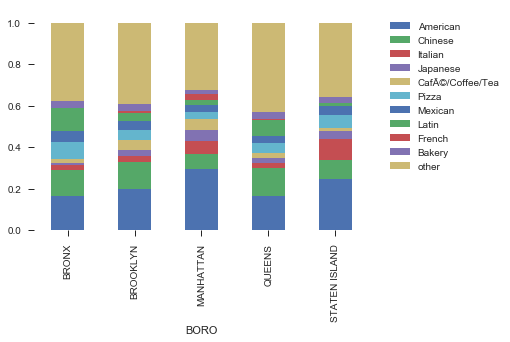

In [18]:
# groupby boros
cuisines_by_boro = nyc_restaurants.groupby(['BORO','CUISINE DESCRIPTION'])['DBA'].count()
cuisines_by_boro = cuisines_by_boro.unstack()

## fill null values
cuisines_by_boro.fillna(0,inplace=True)

## sort by manhattan
cuisines_by_boro.sort_values('MANHATTAN',axis=1,ascending=False,inplace=True)

## drop missing value for boro
cuisines_by_boro.drop('Missing',inplace=True)

# place smaller cuisines in category "other"
cuisines_by_boro['other'] = 0

for column in cuisines_by_boro.columns[10:-1]:
    cuisines_by_boro['other'] = cuisines_by_boro['other']+cuisines_by_boro[column]
    cuisines_by_boro.drop(column,axis=1,inplace=True)

cuisines_by_boro['total'] = cuisines_by_boro.sum(axis=1)

# calculate distribution of grades across boros
cuisines_by_boro_percent = cuisines_by_boro.copy()

for column in cuisines_by_boro_percent.columns:
    cuisines_by_boro_percent[column] = cuisines_by_boro_percent[column]/cuisines_by_boro_percent['total']

cuisines_by_boro_percent.drop('total',axis=1,inplace=True)

cuisines_by_boro_percent.plot(kind='bar', stacked=True,)
plt.legend(bbox_to_anchor=(1.05, .975), loc=2, borderaxespad=0.)
sns.despine(left=True,bottom=True)

### what is the distribution of scores?

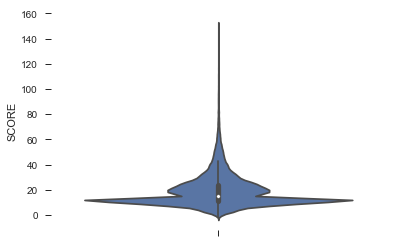

In [19]:
sns.violinplot(y='SCORE',data=nyc_restaurants)
sns.despine(left=True,bottom=True)

### do restaurants get different scores depending on the day of week they're evaluated?

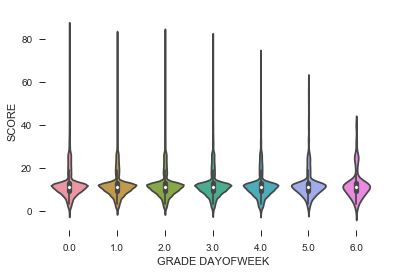

In [20]:
## convert dates to dayofweek
nyc_restaurants['GRADE DAYOFWEEK'] = pd.to_datetime(nyc_restaurants['GRADE DATE'], format='%m/%d/%Y').dt.dayofweek

## boxplot
sns.violinplot('GRADE DAYOFWEEK','SCORE',data=nyc_restaurants)
sns.despine(left=True,bottom=True)

### do any boros outperform the others?

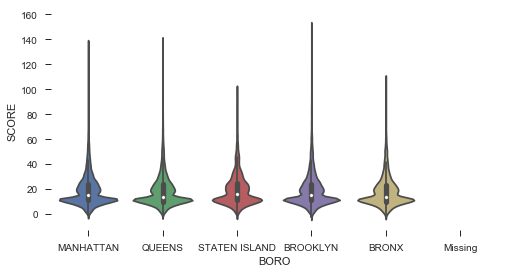

In [21]:
fig, ax = plt.subplots(figsize=(8,4))
sns.violinplot('BORO','SCORE',data=nyc_restaurants,ax=ax)
sns.despine(left=True,bottom=True)

### do any cuisine types outperform others?

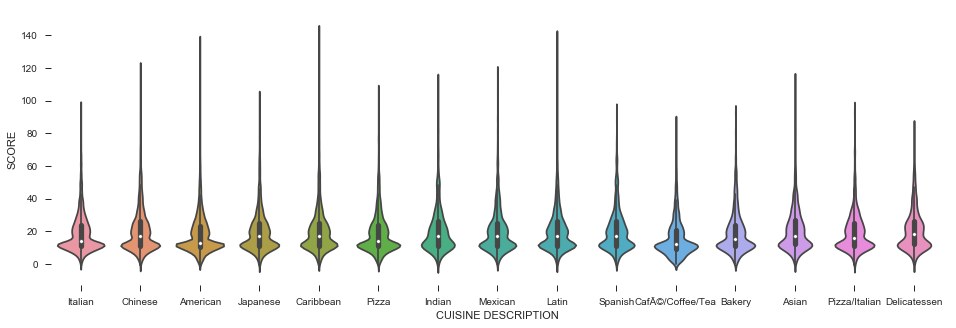

In [22]:
# is there a correlation between grade and score?
## filter nyc down to top cuisines
top_cuisines_list = cuisines['index'].tolist()[:15]
nyc_restaurants_top_cuisines = nyc_restaurants[nyc_restaurants['CUISINE DESCRIPTION'].apply(lambda cuisine: cuisine in top_cuisines_list)]

# plot
fig, ax = plt.subplots(figsize=(16,5))
sns.violinplot('CUISINE DESCRIPTION','SCORE',data=nyc_restaurants_top_cuisines,ax=ax)
sns.despine(left=True,bottom=True)

### where are these restaurants?

In [ ]:
# group nyc_restaurants by zipcode
restaurants_by_zip = nyc_restaurants.groupby('ZIPCODE')['DBA'].count().reset_index()

In [ ]:
os.chdir(location+'/data/nyc_zipcode_boundaries')
fig, ax = plt.subplots(figsize=(10,20))

# bring in section of NYC map
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=40.77895, lon_0=-73.9482,
            llcrnrlon=-74.268, llcrnrlat=40.4855, urcrnrlon=-73.68, urcrnrlat=40.93)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# m.drawcoastlines()

# bring in NYC zipcode boundaries
m.readshapefile('nyc_zipcode_boundaries', 'zips')

# store shapes and zips from shapefile in dataframe
df_poly = pd.DataFrame({
    'shapes': [Polygon(np.array(shape), True) for shape in m.zips],
    'zip': [zipcode['postalCode'] for zipcode in m.zips_info]
    })

## turn zipcodes into numbers
df_poly['zip'] = pd.to_numeric(df_poly['zip'])

# merge df_poly with restaurants_by_zip
df_poly = df_poly.merge(restaurants_by_zip, left_on='zip', right_on='ZIPCODE', how='left')

# choose a color map
cmap = plt.get_cmap('Oranges')

# create a patch collection, set zorder=2 to make sure it appears on top of the map
pc = PatchCollection(df_poly.shapes, zorder=2)

# normalize values
norm = Normalize()
norm_count = norm(df_poly['DBA'].fillna(0).values)

# use count to adjust color intensity
pc.set_facecolor(cmap(norm_count))

# add onto axis
ax.add_collection(pc)